In [1]:
import pandas as pd
import numpy as np

/tmp/SLURM_18745782/ipykernel_21338/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
np.random.seed(1)

Series and Dataframes

Pandas actually has two data structures, Series and Dataframes. A Dataframe is a two dimensional data structure. It is comprised of rows and columns of data. A Series is the data structure for a single column of a dataframe. Certain pandas operations will return a Series as a standalone data structure.

Both data structures also have an 'index' which uniquely identifies each row. By default, Pandas will assign an integer id as the index, however you can override this and set a column of your choosing as the index (does not have to be an integer) as long as all values in that column are unique.

Series

In [3]:
data = np.random.rand(5)
pd.Series(data)

0    0.417022
1    0.720324
2    0.000114
3    0.302333
4    0.146756
dtype: float64

In [4]:
pd.Series(data, index = ['Astronomy', 'Geology', 'Economics', 'English', 'History'])

Astronomy    0.417022
Geology      0.720324
Economics    0.000114
English      0.302333
History      0.146756
dtype: float64

Dataframe

In [5]:
planets_data = np.array([[0.330, 4879, 3.7, 88.0],
            [4.87, 12104, 8.9, 224.7],
            [5.97, 12756, 9.8, 365.2 ],
            [0.642, 6792, 3.7, 687.0],
            [1898, 142984, 23.1, 4331],
            [568, 120536, 9.0, 10747],
            [86.8, 51118, 8.7, 30589],
            [102, 49528, 11.0, 59800]])
planets_data

array([[3.30000e-01, 4.87900e+03, 3.70000e+00, 8.80000e+01],
       [4.87000e+00, 1.21040e+04, 8.90000e+00, 2.24700e+02],
       [5.97000e+00, 1.27560e+04, 9.80000e+00, 3.65200e+02],
       [6.42000e-01, 6.79200e+03, 3.70000e+00, 6.87000e+02],
       [1.89800e+03, 1.42984e+05, 2.31000e+01, 4.33100e+03],
       [5.68000e+02, 1.20536e+05, 9.00000e+00, 1.07470e+04],
       [8.68000e+01, 5.11180e+04, 8.70000e+00, 3.05890e+04],
       [1.02000e+02, 4.95280e+04, 1.10000e+01, 5.98000e+04]])

In [6]:
planets = pd.DataFrame(planets_data, 
                  columns=['mass', 'diameter', 'gravity', 'period'],
                  index=['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn','Uranus','Neptune'])
planets

,mass,diameter,gravity,period
Mercury,0.330,4879.0,3.7,88.0
Venus,4.870,12104.0,8.9,224.7
Earth,5.970,12756.0,9.8,365.2
Mars,0.642,6792.0,3.7,687.0
Jupiter,1898.000,142984.0,23.1,4331.0
Saturn,568.000,120536.0,9.0,10747.0
Uranus,86.800,51118.0,8.7,30589.0
Neptune,102.000,49528.0,11.0,59800.0


Data Ingestion

In [7]:
solar_system = pd.read_csv('solar_system_abbr.csv',index_col=0)
solar_system

,Type,Order from Sun,Diameter,Mass
Name,,,,
Sun,Star,0,1392000.0,333000.00000
Mercury,Terrestrial planet,1,4878.0,0.05500
Venus,Terrestrial planet,2,12104.0,0.81500
Earth,Terrestrial planet,3,12756.0,1.00000
Mars,Terrestrial planet,4,6787.0,0.10700
Jupiter,Gas giant,6,142800.0,318.00000
Saturn,Gas giant,7,120000.0,95.00000
Uranus,Gas giant,8,51118.0,15.00000
Neptune,Gas giant,9,49528.0,17.00000


In [8]:
solar_system.describe()

,Order from Sun,Diameter,Mass
count,14.0000,1.400000e+01,14.000000
mean,6.5000,1.285923e+05,23817.641666
std,4.1833,3.665235e+05,88988.845412
min,0.0000,9.746000e+02,0.000160
25%,3.2500,2.306500e+03,0.002200
50%,6.5000,9.445500e+03,0.461000
75%,9.7500,5.072050e+04,16.500000
max,13.0000,1.392000e+06,333000.000000


Data Cleaning

In [9]:
data = np.array([[-0.349596, -2.017159 ],
 [9999,9999],
 [9999, 9999],
 [0.113889, 0.616122 ],
 [0.014707,  -1.731660],
 [9999, 9999],
 [1.233087, 0.720138],
 [9999,  9999],
 [9999, 9999],
 [9999, 9999]])

In [10]:
df = pd.DataFrame(data)
df

,0,1
0,-0.349596,-2.017159
1,9999.000000,9999.000000
2,9999.000000,9999.000000
3,0.113889,0.616122
4,0.014707,-1.731660
5,9999.000000,9999.000000
6,1.233087,0.720138
7,9999.000000,9999.000000
8,9999.000000,9999.000000
9,9999.000000,9999.000000


In [11]:
df = df.replace(9999.0,0)
df

,0,1
0,-0.349596,-2.017159
1,0.000000,0.000000
2,0.000000,0.000000
3,0.113889,0.616122
4,0.014707,-1.731660
5,0.000000,0.000000
6,1.233087,0.720138
7,0.000000,0.000000
8,0.000000,0.000000
9,0.000000,0.000000


In [12]:
data = np.array([[np.NaN, np.NaN, -0.335410 ],
 [np.NaN,np.NaN, 0.685743],
 [0.077005, 0.085073,0.565144],
 [0.394961, -1.829587,0.494039 ],
 [1.486227,  -0.480726, -0.127278],
 [np.NaN, np.NaN, -0.047668],
 [np.NaN, np.NaN, -1.504804],
 [-0.530518,  -0.881817,-2.687352],
 [0.825376, 1.042468, -0.311527],
 [0.097617, 1.373572, -0.682435]])

In [13]:
df = pd.DataFrame(data)

In [14]:
df

,0,1,2
0,NaN,NaN,-0.335410
1,NaN,NaN,0.685743
2,0.077005,0.085073,0.565144
3,0.394961,-1.829587,0.494039
4,1.486227,-0.480726,-0.127278
5,NaN,NaN,-0.047668
6,NaN,NaN,-1.504804
7,-0.530518,-0.881817,-2.687352
8,0.825376,1.042468,-0.311527
9,0.097617,1.373572,-0.682435


In [15]:
df.dropna(axis=0)

,0,1,2
2,0.077005,0.085073,0.565144
3,0.394961,-1.829587,0.494039
4,1.486227,-0.480726,-0.127278
7,-0.530518,-0.881817,-2.687352
8,0.825376,1.042468,-0.311527
9,0.097617,1.373572,-0.682435


In [16]:
df.dropna(axis=1)

,2
0,-0.335410
1,0.685743
2,0.565144
3,0.494039
4,-0.127278
5,-0.047668
6,-1.504804
7,-2.687352
8,-0.311527
9,-0.682435


Data Visualization

In [17]:
data = np.array([[-0.260156, -1.666998, -0.492616 ],
 [-0.762055, -1.114774, 0.396817],
 [-1.263953, -0.562550, -1.670459],
 [-0.765183, -0.619429, 0.316981 ],
 [-0.165719,  -0.678431, 0.485722],
 [-1.243191, 0.494006, 0.145171],
 [0.373786, -0.769120, -0.929956],
 [-0.081455, 0.229613, -2.251816],
 [-0.536697, 1.228345, -1.040728],
 [0.254220, -0.021794, 1.268333]])

In [18]:
df = pd.DataFrame(data)

In [19]:
df

,0,1,2
0,-0.260156,-1.666998,-0.492616
1,-0.762055,-1.114774,0.396817
2,-1.263953,-0.562550,-1.670459
3,-0.765183,-0.619429,0.316981
4,-0.165719,-0.678431,0.485722
5,-1.243191,0.494006,0.145171
6,0.373786,-0.769120,-0.929956
7,-0.081455,0.229613,-2.251816
8,-0.536697,1.228345,-1.040728
9,0.254220,-0.021794,1.268333


<Axes: >

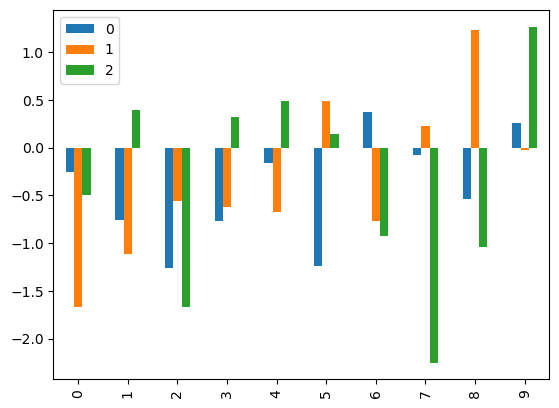

In [20]:
df.plot.bar()

<Axes: >

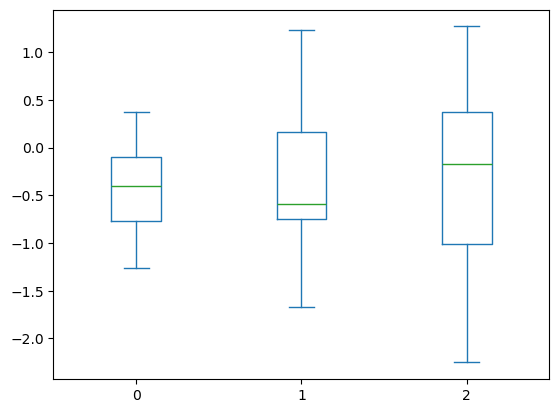

In [21]:
df.plot.box()

<Axes: >

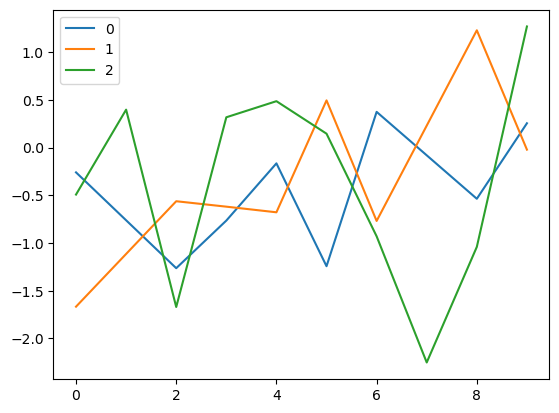

In [22]:
df.plot()

In [23]:
sensor_data = np.array([[-0.260156, -1.666998, -0.492616 ],
 [-0.762055, -1.114774, 0.396817],
 [-1.263953, -0.562550, -1.670459],
 [-0.765183, -0.619429, 0.316981 ],
 [-0.165719,  -0.678431, 0.485722],
 [-1.243191, 0.494006, 0.145171],
 [0.373786, -0.769120, -0.929956],
 [-0.081455, 0.229613, -2.251816],
 [-0.536697, 1.228345, -1.040728],
 [0.254220, -0.021794, 1.268333]])
df = pd.DataFrame(sensor_data, 
                  columns=['sensor1', 'sensor2', 'sensor3'])
df

,sensor1,sensor2,sensor3
0,-0.260156,-1.666998,-0.492616
1,-0.762055,-1.114774,0.396817
2,-1.263953,-0.562550,-1.670459
3,-0.765183,-0.619429,0.316981
4,-0.165719,-0.678431,0.485722
5,-1.243191,0.494006,0.145171
6,0.373786,-0.769120,-0.929956
7,-0.081455,0.229613,-2.251816
8,-0.536697,1.228345,-1.040728
9,0.254220,-0.021794,1.268333


In [24]:
df['sensor1']

0   -0.260156
1   -0.762055
2   -1.263953
3   -0.765183
4   -0.165719
5   -1.243191
6    0.373786
7   -0.081455
8   -0.536697
9    0.254220
Name: sensor1, dtype: float64

In [25]:
df[df['sensor2'] > 0]

,sensor1,sensor2,sensor3
5,-1.243191,0.494006,0.145171
7,-0.081455,0.229613,-2.251816
8,-0.536697,1.228345,-1.040728


In [26]:
df

,sensor1,sensor2,sensor3
0,-0.260156,-1.666998,-0.492616
1,-0.762055,-1.114774,0.396817
2,-1.263953,-0.562550,-1.670459
3,-0.765183,-0.619429,0.316981
4,-0.165719,-0.678431,0.485722
5,-1.243191,0.494006,0.145171
6,0.373786,-0.769120,-0.929956
7,-0.081455,0.229613,-2.251816
8,-0.536697,1.228345,-1.040728
9,0.254220,-0.021794,1.268333


In [27]:
df.drop(df.index[[5]])

,sensor1,sensor2,sensor3
0,-0.260156,-1.666998,-0.492616
1,-0.762055,-1.114774,0.396817
2,-1.263953,-0.562550,-1.670459
3,-0.765183,-0.619429,0.316981
4,-0.165719,-0.678431,0.485722
6,0.373786,-0.769120,-0.929956
7,-0.081455,0.229613,-2.251816
8,-0.536697,1.228345,-1.040728
9,0.254220,-0.021794,1.268333


In [28]:
del df['sensor1']

In [29]:
df

,sensor2,sensor3
0,-1.666998,-0.492616
1,-1.114774,0.396817
2,-0.562550,-1.670459
3,-0.619429,0.316981
4,-0.678431,0.485722
5,0.494006,0.145171
6,-0.769120,-0.929956
7,0.229613,-2.251816
8,1.228345,-1.040728
9,-0.021794,1.268333


Merging DataFrames

In [30]:
data1 = {"_key1": ['K0', 'K1', 'K2', 'K3'], "_key2": ['z0', 'z1', 'z2', 'z3'],"city": ['city_0','city_1','city_2','city_3'], "user_name":
       ['user_0','user_1','user_2','user_3']}

data2 = {"_key1": ['K0', 'K1', 'K2', 'K3'], "_key2": ['z0', 'z1', 'z2', 'z3'],"hire_date": ['h_0','h_1','h_2','h_3'], "profession":
       ['p_0','p_1','p_2','p_3']}

left = pd.DataFrame(data1)
left



,_key1,_key2,city,user_name
0,K0,z0,city_0,user_0
1,K1,z1,city_1,user_1
2,K2,z2,city_2,user_2
3,K3,z3,city_3,user_3


In [31]:
right = pd.DataFrame(data2)
right

,_key1,_key2,hire_date,profession
0,K0,z0,h_0,p_0
1,K1,z1,h_1,p_1
2,K2,z2,h_2,p_2
3,K3,z3,h_3,p_3


In [32]:
pd.concat([left,left])

,_key1,_key2,city,user_name
0,K0,z0,city_0,user_0
1,K1,z1,city_1,user_1
2,K2,z2,city_2,user_2
3,K3,z3,city_3,user_3
0,K0,z0,city_0,user_0
1,K1,z1,city_1,user_1
2,K2,z2,city_2,user_2
3,K3,z3,city_3,user_3


In [33]:
pd.concat([left,right])

,_key1,_key2,city,user_name,hire_date,profession
0,K0,z0,city_0,user_0,NaN,NaN
1,K1,z1,city_1,user_1,NaN,NaN
2,K2,z2,city_2,user_2,NaN,NaN
3,K3,z3,city_3,user_3,NaN,NaN
0,K0,z0,NaN,NaN,h_0,p_0
1,K1,z1,NaN,NaN,h_1,p_1
2,K2,z2,NaN,NaN,h_2,p_2
3,K3,z3,NaN,NaN,h_3,p_3


Matplotlib

2D plotting single line figure

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.0, 2.0, 20)
x

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

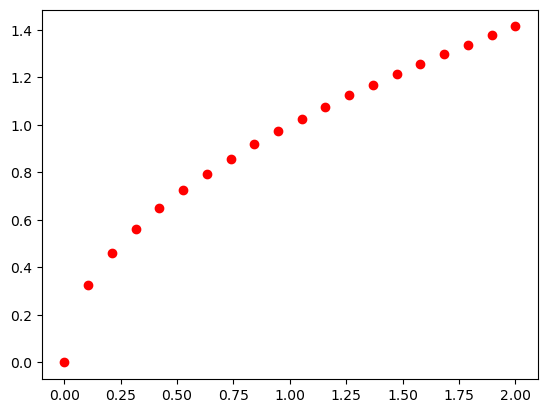

In [35]:
plt.plot(x, np.sqrt(x), 'ro')
plt.show()

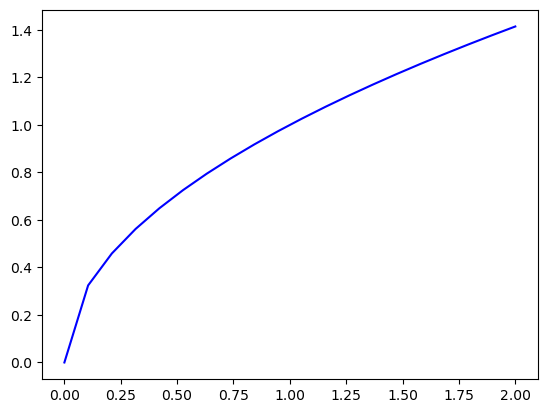

In [36]:
plt.plot(x, np.sqrt(x), 'b-')
plt.show()

Multiple lines on the same figure

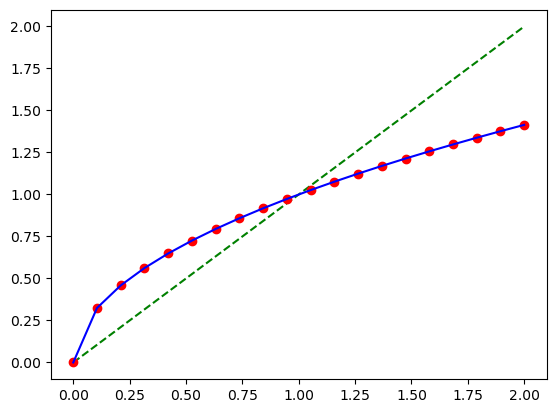

In [37]:
plt.plot(x, x, 'g--', label='green') # green dashed line
plt.plot(x, np.sqrt(x), 'ro', label='red') # red circles
plt.plot(x, np.sqrt(x), 'b-', label='blue') # blue line
plt.show()

Multiple plots on the same figure

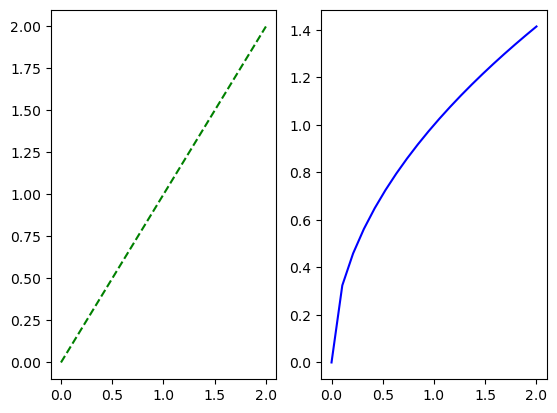

In [38]:
plt.subplot(1,2,1)
plt.plot(x, x, 'g--')
plt.subplot(1,2,2)
plt.plot(x, np.sqrt(x), 'b-')
plt.show()

Save a figure to a file

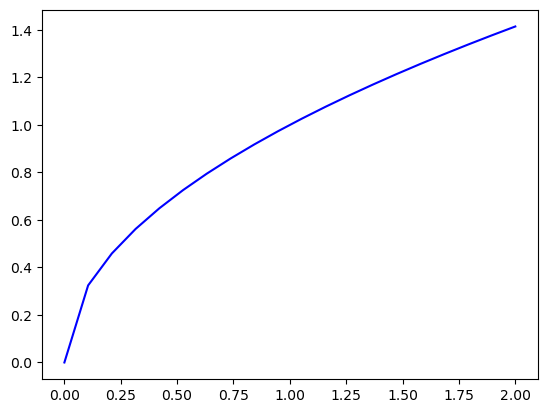

In [39]:
plt.plot(x, np.sqrt(x), 'b-')

plt.savefig('myfig.png') # can also save directly to pdf by just changing the file extension